In [84]:
import numpy as np
import operator
import matplotlib 
import matplotlib.pyplot as plt

## 数据收集 -> 整理 -> 分析 -> 训练 -> 测试 -> 使用

# k-NearestNeighbor

In [85]:
# 构造数据集
def createDataSet():
    group = np.array([[1.0,1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels
# 
group,labels = createDataSet()
group

array([[ 1. ,  1. ],
       [ 1. ,  1. ],
       [ 0. ,  0. ],
       [ 0. ,  0.1]])

In [86]:
# kNN分类器
def classify0(inX,dataSet,labels,k):
    # 计算欧氏距离
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX,(dataSetSize,1))-dataSet # 其实这里可以使用广播
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    # 排序
    sortedDistIndicies = distances.argsort() # 仅索引
    # 统计出前k个label，并统计频数
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0)+1 # 返回指定key的value，不存在时返回默认值
    # 拍讯统计结果选取频数最大的label
    # dict.items() 得到一个元组列表
    # key指定排序的依据，operator.itemgetter(1),传入一个索引函数，选取第二个值
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse = True) 
    return sortedClassCount[0][0]

In [87]:
def classify1(inX,dataSet,labels,k):
    # 计算欧氏距离
    dataSetSize = dataSet.shape[0]
    diffMat = inX-dataSet  # 其实这里可以使用广播,后缘维度相同，第一维度缺失
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    # 排序
    sortedDistIndicies = distances.argsort() # 仅索引
    # 统计出前k个label，并统计频数
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0)+1 # 返回指定key的value，不存在时返回默认值
    # 拍讯统计结果选取频数最大的label
    # dict.items() 得到一个元组列表
    # key指定排序的依据，operator.itemgetter(1),传入一个索引函数，选取第二个值
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse = True) 
    return sortedClassCount[0][0]

In [88]:
classify1([0,0],group,labels,3)

'B'

In [89]:
# 将文件整理成Matrix格式，规则化
def file2matrix(filename):
    file = open(filename)
    arrayLines = file.readlines()
    numberOfLines = len(arrayLines)
    returnMat = np.zeros((numberOfLines,3)) # zeros类型默认是float64，可以优化的地方
    classLabelVector = []
    index = 0
    for line in arrayLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3] # 自动str-> float64的转换
        classLabelVector.append(int(listFromLine[-1])) # 这里需要强制转换
        index += 1
    return returnMat,classLabelVector

In [98]:
datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')

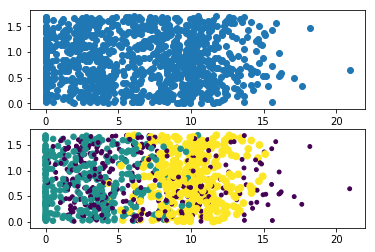

In [91]:
# 2 3 列
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.scatter(datingDataMat[:,1],datingDataMat[:,2])
ax2 = fig.add_subplot(212)
ax2.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*np.array(datingLabels),15.0*np.array(datingLabels)) # 设置大小颜色信息
plt.show()

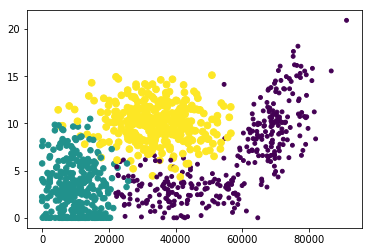

In [92]:
# 1 2 列
fig2 = plt.figure()
ax3 = fig2.add_subplot(111)
ax3.scatter(datingDataMat[:,0],datingDataMat[:,1],15.0*np.array(datingLabels),15.0*np.array(datingLabels))
plt.show()

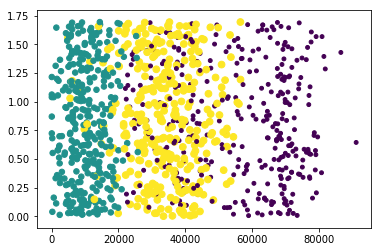

In [93]:
# 1 3 列
fig3 = plt.figure()
ax4 = fig3.add_subplot(111)
ax4.scatter(datingDataMat[:,0],datingDataMat[:,2],15.0*np.array(datingLabels),15.0*np.array(datingLabels))
plt.show()

In [94]:
# 归一化 
def autoNorm1(dataSet):
    minVals = dataSet.min(axis=0) # 以纵向为计算方向,对每一列求最大值,是一个多个值的数组，所以不能直接用除法，得用广播
    maxVals = dataSet.max(axis=0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - minVals  # 仅有一个维度不同，且维度为1，或后援维度相同，确实第一维度情况下可以使用广播
    normDataSet = normDataSet/ranges
    return normDataSet,ranges,minVals

def autoNorm2(dataSet):
    minVals = dataSet.min(axis=0) # 以纵向为计算方向,对每一列求最大值,是一个多个值的数组，所以不能直接用除法，得用广播
    maxVals = dataSet.max(axis=0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals,(m,1))
    normDataSet = normDataSet/np.tile(ranges,(m,1))
    return normDataSet,ranges,minVals    

In [68]:
normMat,ranges,minVals = autoNorm1(datingDataMat)

In [70]:
normMat,ranges,minVals =autoNorm2(datingDataMat)

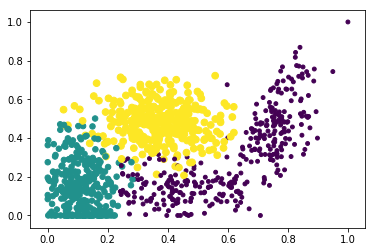

In [95]:
# 归一化进行整体的缩放，并不影响分布特性
fig3 = plt.figure()
ax4 = fig3.add_subplot(111)
ax4.scatter(normMat[:,0],normMat[:,1],15.0*np.array(datingLabels),15.0*np.array(datingLabels))
plt.show()

In [121]:
# 约会实例数据测试代码
def datingClassTest():
    hoRatio = 0.10
    datingDataMat,datingLabels = file2matrix("datingTestSet2.txt")
    normMat,ranges,minVals = autoNorm1(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(hoRatio * m)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print("真实值是：%d，预测值是：%d"%(datingLabels[i],classifierResult))
        if classifierResult != datingLabels[i]: errorCount += 1.0
    print('错误率为：%f'%(errorCount/numTestVecs))
        

In [122]:
datingClassTest()

真实值是：3，预测值是：3
真实值是：2，预测值是：2
真实值是：1，预测值是：1
真实值是：1，预测值是：1
真实值是：1，预测值是：1
真实值是：1，预测值是：1
真实值是：3，预测值是：3
真实值是：3，预测值是：3
真实值是：1，预测值是：1
真实值是：3，预测值是：3
真实值是：1，预测值是：1
真实值是：1，预测值是：1
真实值是：2，预测值是：2
真实值是：1，预测值是：1
真实值是：1，预测值是：1
真实值是：1，预测值是：1
真实值是：1，预测值是：1
真实值是：1，预测值是：1
真实值是：2，预测值是：2
真实值是：3，预测值是：3
真实值是：2，预测值是：2
真实值是：1，预测值是：1
真实值是：2，预测值是：3
真实值是：3，预测值是：3
真实值是：2，预测值是：2
真实值是：3，预测值是：3
真实值是：2，预测值是：2
真实值是：3，预测值是：3
真实值是：2，预测值是：2
真实值是：1，预测值是：1
真实值是：3，预测值是：3
真实值是：1，预测值是：1
真实值是：3，预测值是：3
真实值是：1，预测值是：1
真实值是：2，预测值是：2
真实值是：1，预测值是：1
真实值是：1，预测值是：1
真实值是：2，预测值是：2
真实值是：3，预测值是：3
真实值是：3，预测值是：3
真实值是：1，预测值是：1
真实值是：2，预测值是：2
真实值是：3，预测值是：3
真实值是：3，预测值是：3
真实值是：3，预测值是：3
真实值是：1，预测值是：1
真实值是：1，预测值是：1
真实值是：1，预测值是：1
真实值是：1，预测值是：1
真实值是：2，预测值是：2
真实值是：2，预测值是：2
真实值是：1，预测值是：1
真实值是：3，预测值是：3
真实值是：2，预测值是：2
真实值是：2，预测值是：2
真实值是：2，预测值是：2
真实值是：2，预测值是：2
真实值是：3，预测值是：3
真实值是：1，预测值是：1
真实值是：2，预测值是：2
真实值是：1，预测值是：1
真实值是：2，预测值是：2
真实值是：2，预测值是：2
真实值是：2，预测值是：2
真实值是：2，预测值是：2
真实值是：2，预测值是：2
真实值是：3，预测值是：3
真实值是：2，预测值是：2
真实值是：3，预测值是：3
真实值是：1，预测值是：1
真实值是：2，预测值是：2
真实值是：3

In [131]:
def classifyPerson():
    resultList = ["not at all",'in small doses','in large doses']
    percentTats = float(input("玩游戏的时间百分比："))
    ffMile = float(input("飞行里程："))
    iceCream = float(input("冰激凌消耗量："))
    normMat,rangs,minVals = autoNorm1(datingDataMat)
    inArr = np.array([ffMile,percentTats,iceCream])
    result = classify0((inArr-minVals)/rangs,normMat,datingLabels,3)
    print("对于这个人：%s"%(resultList[result-1]))

In [132]:
classifyPerson()

玩游戏的时间百分比：10
飞行里程：1000
冰激凌消耗量：0.5
对于这个人：in small doses
